In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import model_SEIRX
import agent_patient
import importlib
import viz
importlib.reload(viz)
importlib.reload(model_SEIRX)
importlib.reload(agent_patient)

<module 'agent_patient' from '/home/jana/CSH/medical/analysis/nursing_homes/agent_patient.py'>

In [2]:
N_patients = 50
N_employees = 10
N_steps = 50
WB = 2
G = nx.readwrite.gpickle.read_gpickle('../../data/nursing_homes/WB{}_static_interactions.gpickle'\
                                  .format(WB))

SIR_model = model_SEIRX.SIR(G, N_employees, 0)
E = []
I = []
R = []
for i in range(N_steps):
    #print('*** step {} *** '.format(i))
    SIR_model.step()
    E_tmp = [a.exposed for a in SIR_model.schedule.agents]
    E.append(np.asarray(E_tmp).sum())
    I_tmp = [a.infected for a in SIR_model.schedule.agents]
    I.append(np.asarray(I_tmp).sum())
    R_tmp = [a.recovered for a in SIR_model.schedule.agents]
    R.append(np.asarray(R_tmp).sum())
    
E = np.asarray(E)
I = np.asarray(I)
R = np.asarray(R)
S = np.asarray([N_patients] * N_steps) - E - I - R

In [3]:
pop_numbers = SIR_model.datacollector.get_model_vars_dataframe()
pop_numbers['S_patient'] = N_patients - pop_numbers.E_patient - pop_numbers.I_patient - pop_numbers.R_patient

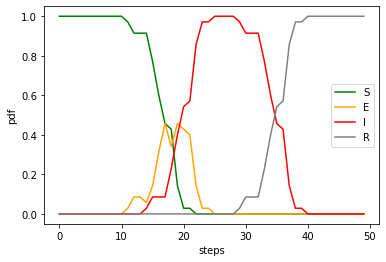

In [4]:
importlib.reload(viz)
fig, ax = plt.subplots()
viz.draw_infection_timeline(SIR_model, 'patient', ax)

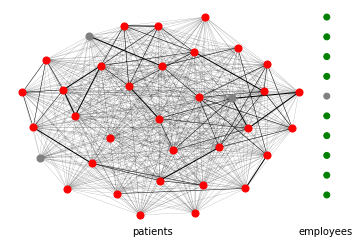

In [20]:
importlib.reload(viz)
fig, ax = plt.subplots()
viz.draw_states(SIR_model, 30, ax)